# Can you predict how capable each applicant is of repaying a loan?

# Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import gc
import time
from contextlib import contextmanager
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

plt.rcParams.update({'figure.max_open_warning': 200})
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
from numpy import array
from matplotlib import cm
from sklearn import preprocessing


In [2]:
pd.set_option( "display.max_columns", None)

credit  = pd.read_csv("credit_train.csv") 


# PART ONE

# Exploratory Data Analysis
In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

# How big is the training dataset?
a look at the data set

In [3]:
print("The credit_train.csv dataset has {} entires or columns.".format(credit.shape))

The credit_train.csv dataset has (307511, 122) entires or columns.


# lets Check out the stats

In [4]:
credit.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

# How do the first 5 rows look like?- Just a sanity check

In [5]:
credit.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

# data cleaning

Lets now start dealing with missing values.

In [6]:
credit.isnull()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,Tru

lets find the count of null values 

In [7]:
credit.isnull().sum().sort_values(ascending=False)

COMMONAREA_MEDI                214865
COMMONAREA_AVG                 214865
COMMONAREA_MODE                214865
NONLIVINGAPARTMENTS_MODE       213514
NONLIVINGAPARTMENTS_MEDI       213514
                                ...  
REG_CITY_NOT_LIVE_CITY              0
LIVE_REGION_NOT_WORK_REGION         0
REG_REGION_NOT_WORK_REGION          0
HOUR_APPR_PROCESS_START             0
SK_ID_CURR                          0
Length: 122, dtype: int64

In [8]:
#lets put all the variables with missing values and their percentage in a table

def missing_values_table(df):
    missing_values= df.isnull().sum()
    
    # Percentage of missing values
    
    missing_percentage = 100 *df.isnull().sum() /len(df)
    
    missing_values_table = pd.concat([missing_values, missing_percentage],axis=1)
    
    missing_val_table_columns = missing_values_table.rename(columns={0 : 'Missing Values', 1 : '% of Missing Values'})
    
    missing_val_table_columns = missing_val_table_columns[
            missing_val_table_columns.iloc[:,1] != 0].sort_values(
        '% of Missing Values', ascending=False).round(1)
    
    return missing_val_table_columns



# Lets see the missing value table
missing_values_table(credit)

,Missing Values,% of Missing Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
...,...,...
EXT_SOURCE_2,660,0.2
AMT_GOODS_PRICE,278,0.1
AMT_ANNUITY,12,0.0
CNT_FAM_MEMBERS,2,0.0


out of the 122 columns, 68 of them have missing values. in this case, should we drop all of the columns with missing values? no. i think we should drop only the first 49 that have over 47 percent missing value.

In [9]:
(missing_values_table(credit)).head(49)

,Missing Values,% of Missing Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


# before dropping the missing columns with over 47% of missing values, lets quickly do some analysis on the data

# Data Analysis

# 1) Who is the highest borrower? Male or Female?

<AxesSubplot:xlabel='CODE_GENDER', ylabel='count'>

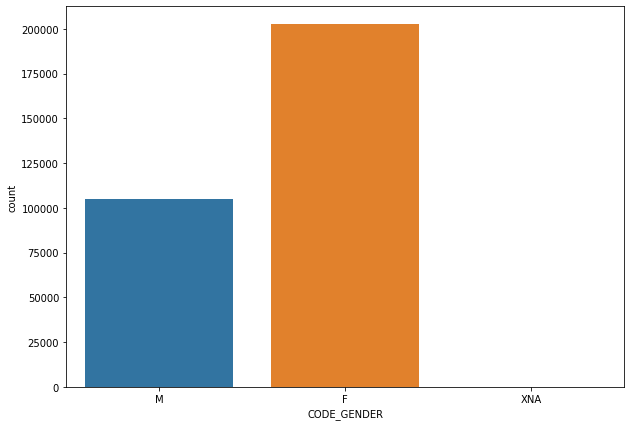

In [10]:
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(x='CODE_GENDER',data=credit)

In [11]:
print("Surprisingly, females are the highest borrowers with counts:\n{}".format(credit.CODE_GENDER.value_counts()))

Surprisingly, females are the highest borrowers with counts:
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64


# 2) How is the distribution of target labels? - Did most people return on time ?

<AxesSubplot:xlabel='TARGET', ylabel='count'>

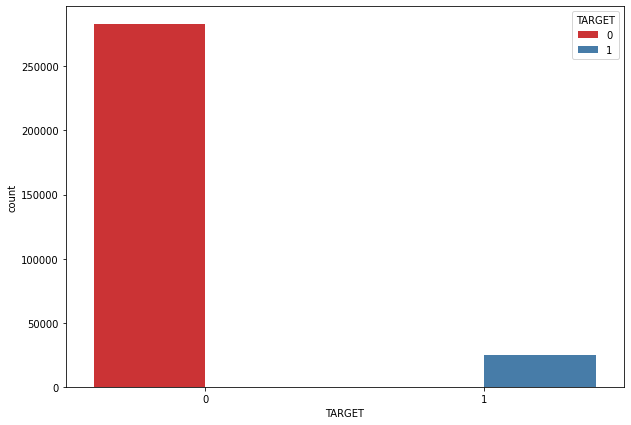

In [12]:
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(x ='TARGET',data=credit, hue='TARGET',palette="Set1")

Based on the description, most people returned the money {1- people with difficulties, 0 - other cases }. Very clearly the target label is imbalanced.

# 3) is it Female who has more difficulties or is it Male?

<AxesSubplot:xlabel='TARGET', ylabel='count'>

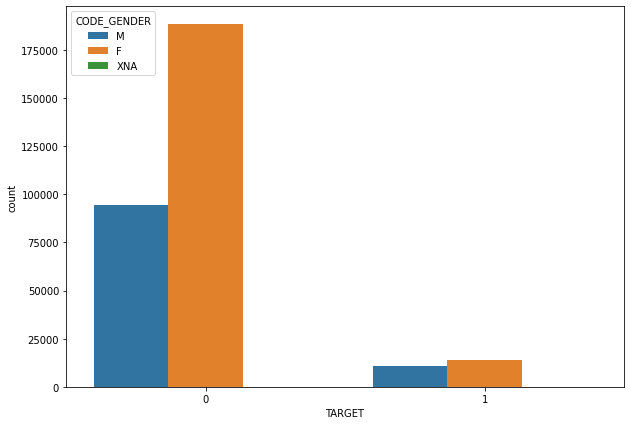

In [13]:
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(x='TARGET',hue='CODE_GENDER',data=credit)

Females have relatively more difficulties in repaying the loan back, as seen with Target = 1. This could be because of the general larger population of female applicants as opposed to male applicants.

# 4) Who owns most number of the cars? M or F?
Is it because they (Male and Female) own car(s) - How many male and female own cars?

<AxesSubplot:xlabel='CODE_GENDER', ylabel='count'>

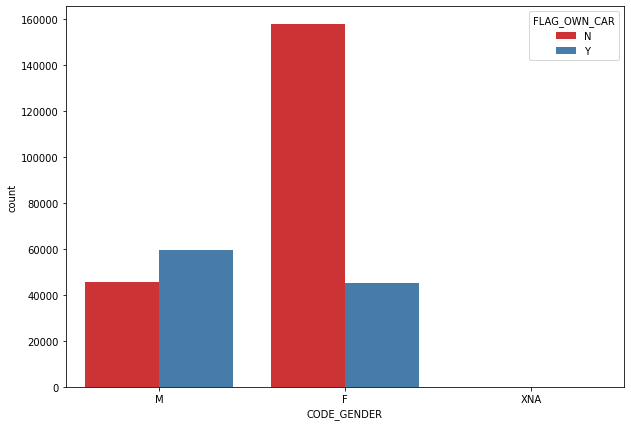

In [14]:
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(x='CODE_GENDER', hue='FLAG_OWN_CAR', data=credit,palette="Set1")

im not surprise that Females own less number of cars

# 5) How old is the client's car(s)? - Are they investing that money in fixing those car(s) or are they using that money to buy a new car?

<AxesSubplot:xlabel='CODE_GENDER', ylabel='OWN_CAR_AGE'>

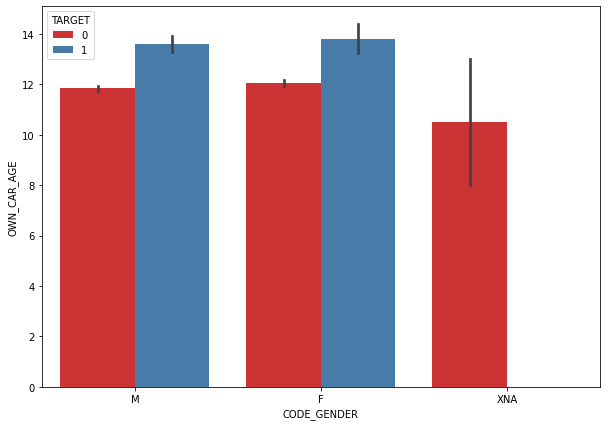

In [15]:
fig, ax = plt.subplots(figsize=(10,7))
sns.barplot(x='CODE_GENDER',y='OWN_CAR_AGE',hue='TARGET',data=credit,palette="Set1")

<AxesSubplot:xlabel='CODE_GENDER', ylabel='OWN_CAR_AGE'>

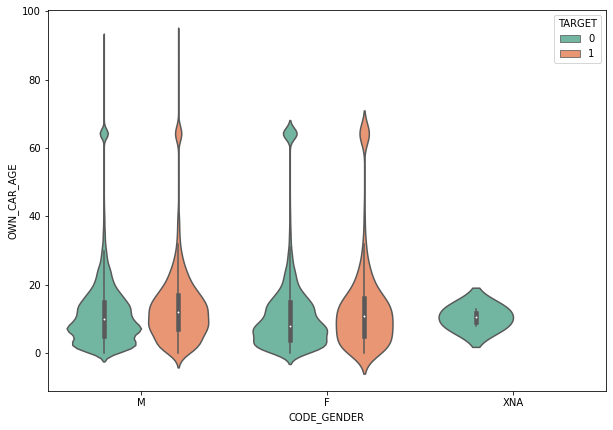

In [16]:
fig, ax = plt.subplots(figsize=(10,7))
sns.violinplot(x='CODE_GENDER',y='OWN_CAR_AGE',hue='TARGET',data=credit,palette="Set2")

People with repaying difficulty mostly have older cars - Are they spending loan money on cars?

In [17]:
credit['OWN_CAR_AGE'].unique()

array([nan, 26., 17.,  8., 23.,  7., 14.,  1.,  3., 13., 10.,  2., 21.,
       20., 22., 65.,  5., 11.,  9.,  4., 15., 12., 25.,  6., 64.,  0.,
       27., 19., 28., 18., 16., 30., 36., 24., 39., 29., 40., 41., 31.,
       42., 37., 35., 34., 33., 54., 38., 32., 43., 55., 49., 44., 63.,
       46., 45., 48., 56., 51., 57., 69., 50., 47., 91., 52.])

its surprising to see that, some people own cars that are over 90 years old.

lets see those that own cars that are over 60 years. and whether they are male or female. and if they are mostly male, that means they might have inherited those cars from their parent

In [18]:
 #lets see the Number of male that own cars  that are above 60 years
    
credit[(credit['CODE_GENDER'] == 'M') &
     (credit['OWN_CAR_AGE'] > 60.)]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
85,100100,0,Cash loans,M,Y,Y,2,202500.0,796396.5,38443.5,643500.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.008019,-15909,-1094,-3134.0,-4180,65.0,1,1,0,1,0,1,Managers,4.0,2,2,FRIDAY,17,0,0,0,0,1,1,Industry: type 11,0.447675,0.495765,0.824595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1876.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
415,100479,0,Revolving loans,M,Y,Y,0,90000.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9496,-189,-4182.0,-2153,64.0,1,1,0,1,0,0,Laborers,1.0,2,2,SUNDAY,7,0,0,0,0,1,1,Business Entity Type 3,0.084902,0.573584,0.452534,0.0495,0.0525,0.9742,0.6464,0.0072,0.00,0.1034,0.1250,0.0417,0.0130,0.0403,0.0397,0.0,0.0000,0.0504,0.0545,0.9742,0.6602,0.0072,0.0000,0.1034,0.1250,0.0417,0.0133,0.0441,0.0414,0.0,0.0000,0.0500,0.0525,0.9742,0.6511,0.0072,0.00,0.1034,0.1250,0.0417,0.0132,0.0410,0.0404,0.0,0.0000,reg oper account,block of flats,0.0352,"Stone, brick",No,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
425,100491,0,Cash loans,M,Y,N,0,193500.0,314100.0,17167.5,225000.0,Unaccompanied,Working,Secondary / secondary special,Married,With parents,0.003818,-12018,-644,-1199.0,-560,64.0,1,1,0,1,0,0,Drivers,2.0,2,2,FRIDAY,8,0,0,0,0,1,1,Self-employed,0.150956,0.082627,NaN,0.0247,0.0362,0.9970,NaN,NaN,0.00,0.0345,0.0833,NaN,NaN,NaN,0.0213,NaN,0.0727,0.0252,0.0375,0.9970,NaN,NaN,0.0000,0.0345,0.0833,NaN,NaN,NaN,0.0222,NaN,0.0769,0.0250,0.0362,0.9970,NaN,NaN,0.00,0.0345,0.0833,NaN,NaN,NaN,0.0217,NaN,0.0742,NaN,block of flats,0.0326,Monoli

men that own cars that are over 60 years of age are 1304. lets check if we have women too.

In [19]:
 #lets see the Number of male that own cars  that are above 60 years
    
credit[(credit['CODE_GENDER'] == 'F') &
     (credit['OWN_CAR_AGE'] > 60.)]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
134,100156,0,Cash loans,F,Y,N,2,157500.0,945000.0,39127.5,945000.0,Family,Commercial associate,Secondary / secondary special,Married,With parents,0.018209,-14235,-5411,-2248.0,-5376,65.0,1,1,0,1,0,0,Medicine staff,4.0,3,3,THURSDAY,14,0,0,0,0,0,0,Medicine,NaN,0.597823,0.746300,0.0289,0.0698,0.9682,0.5648,0.0044,0.00,0.1034,0.1250,0.125,0.0437,0.0202,0.0264,0.0154,0.0326,0.0294,0.0725,0.9682,0.5818,0.0045,0.0000,0.1034,0.1250,0.125,0.0447,0.0220,0.0275,0.0156,0.0345,0.0291,0.0698,0.9682,0.5706,0.0045,0.00,0.1034,0.1250,0.125,0.0444,0.0205,0.0269,0.0155,0.0333,reg oper account,block of flats,0.0278,"Stone, brick",No,0.0,0.0,0.0,0.0,-2703.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
237,100275,0,Cash loans,F,Y,Y,0,108000.0,646920.0,18670.5,540000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.019101,-23650,365243,-11380.0,-4923,64.0,1,0,0,1,0,0,NaN,1.0,2,2,SUNDAY,13,0,0,0,0,0,0,XNA,NaN,0.731907,0.720944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1563.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
272,100315,0,Cash loans,F,Y,Y,1,121500.0,288873.0,21064.5,238500.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018029,-10203,-59,-6422.0,-2513,65.0,1,1,0,1,0,0,Sales staff,3.0,3,3,THURSDAY,10,0,0,0,0,0,0,Business Entity Type 2,0.264876,0.592295,0.495666,0.0361,NaN,0.9891,NaN,NaN,0.04,0.0345,0.3333,NaN,NaN,NaN,0.0411,NaN,NaN,0.0368,NaN,0.9891,NaN,NaN,0.0403,0.0345,0.3333,NaN,NaN,NaN,0.0428,NaN,NaN,0.0364,NaN,0.9891,NaN,NaN,0.04,0.0345,0.3333,NaN,NaN,NaN,0.0418,NaN,NaN,NaN,block of flats,0.0323,Panel,No,5.0,0.0,5.0,0.0,-1441.0

its surprissing to see that we have more women thats owns cars that are over 60 years of age with over 2035 while compare to the men. although, the reason could be that, we have more women than men in the dataset

# car age frequency destribution with kde

<AxesSubplot:xlabel='OWN_CAR_AGE', ylabel='Density'>

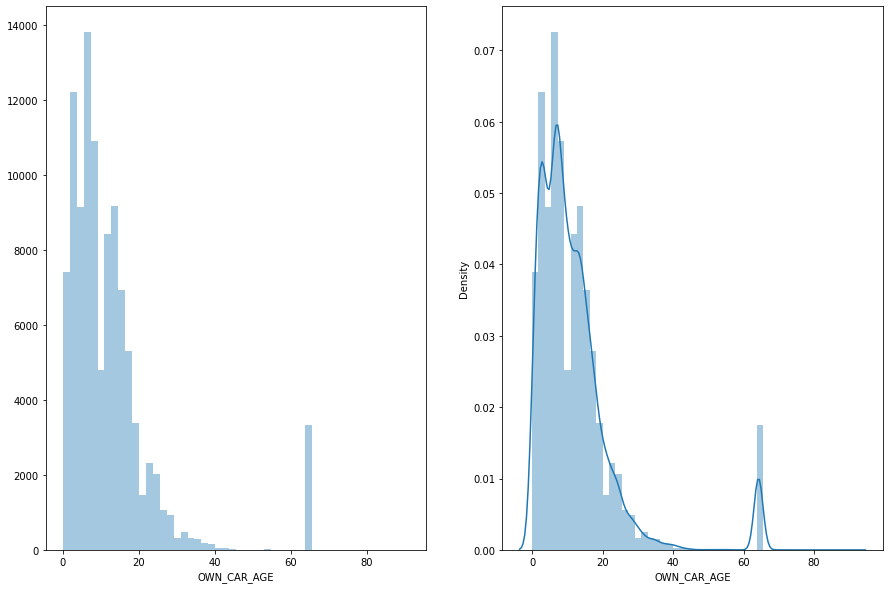

In [20]:
fig, ax = plt.subplots(ncols=2,nrows=1,figsize=(15,10))
plt.subplot(1,2,1)
sns.distplot(credit['OWN_CAR_AGE'].dropna(),norm_hist=False,kde=False)
plt.subplot(1,2,2)
sns.distplot(credit['OWN_CAR_AGE'].dropna(),norm_hist=False,kde=True)

Looks kind of right skewed normal distribution with a bump near 60+ years! Most clients car is around 10 years

# 6) how many children does client have?
does having many children affect repayment

<AxesSubplot:xlabel='CODE_GENDER', ylabel='CNT_CHILDREN'>

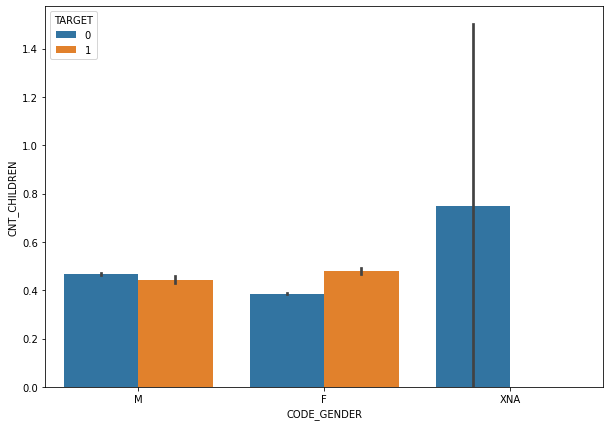

In [21]:
fig, ax = plt.subplots(figsize=(10,7))
sns.barplot(x='CODE_GENDER',y='CNT_CHILDREN',hue='TARGET',data=credit)

In [22]:
credit['CNT_CHILDREN'].unique()

array([ 0,  1,  2,  3,  4,  7,  5,  6,  8,  9, 11, 12, 10, 19, 14],
      dtype=int64)

# 7) does having a child affect repayment?

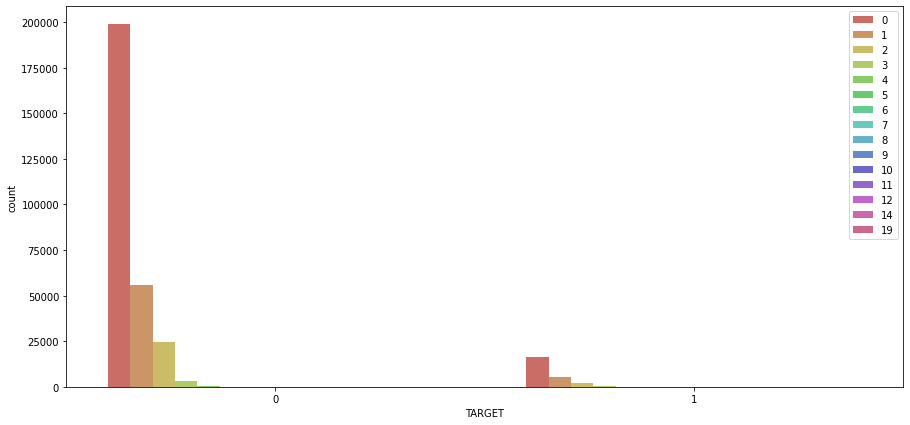

In [23]:
fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(x='TARGET',hue='CNT_CHILDREN',data=credit,palette="hls")
plt.legend(loc=1)

Most borrowers who have no children had no difficulties repaying - having children impacts the repayment process - it slows down by making it difficult for the client.

# Occupation
1) Who are the major borrowers? - What are their occupations?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Laborers'),
  Text(1, 0, 'Core staff'),
  Text(2, 0, 'Accountants'),
  Text(3, 0, 'Managers'),
  Text(4, 0, 'Drivers'),
  Text(5, 0, 'Sales staff'),
  Text(6, 0, 'Cleaning staff'),
  Text(7, 0, 'Cooking staff'),
  Text(8, 0, 'Private service staff'),
  Text(9, 0, 'Medicine staff'),
  Text(10, 0, 'Security staff'),
  Text(11, 0, 'High skill tech staff'),
  Text(12, 0, 'Waiters/barmen staff'),
  Text(13, 0, 'Low-skill Laborers'),
  Text(14, 0, 'Realty agents'),
  Text(15, 0, 'Secretaries'),
  Text(16, 0, 'IT staff'),
  Text(17, 0, 'HR staff')])

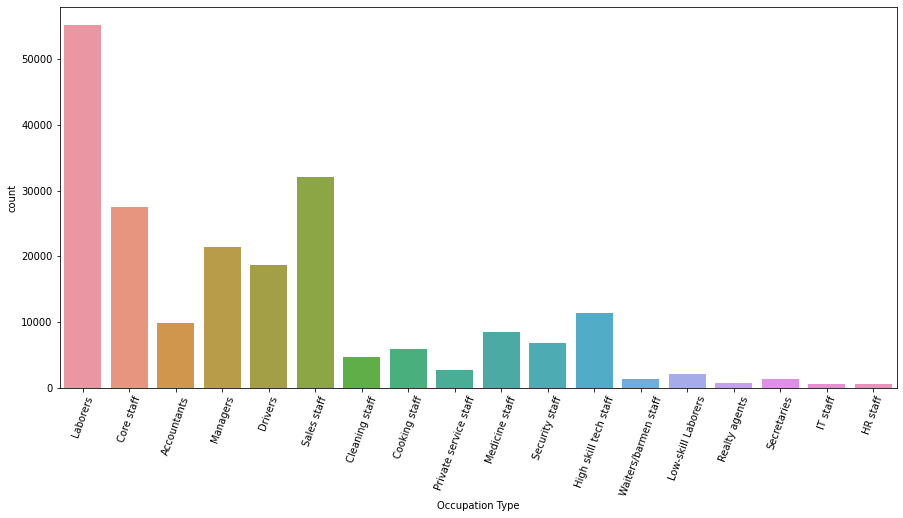

In [24]:
fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(x='OCCUPATION_TYPE',data=credit)
plt.xlabel("Occupation Type")
plt.xticks(rotation=70)

# 2) How economically stable are clients? Who are the most and least stable?

Text(0, 0.5, 'Average Annual family income')

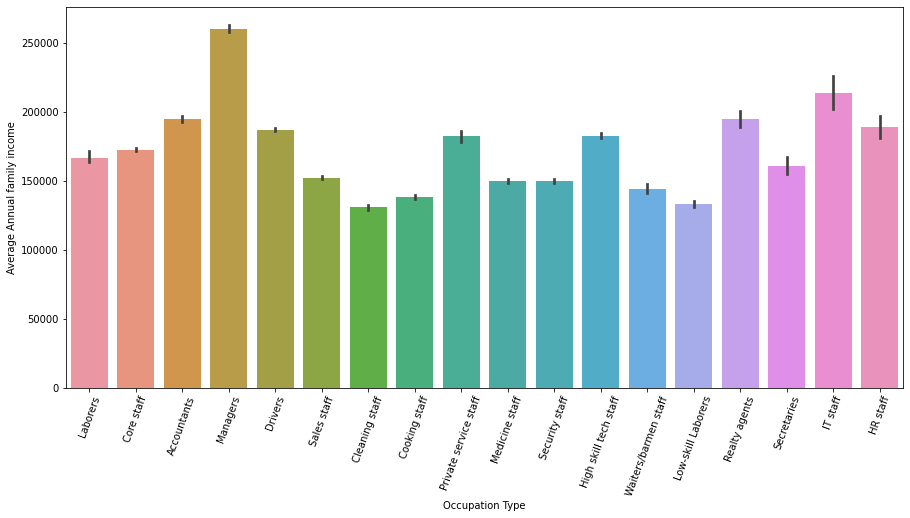

In [25]:
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(x='OCCUPATION_TYPE',y='AMT_INCOME_TOTAL',data=credit)
plt.xticks(rotation=70)
plt.xlabel("Occupation Type")
plt.ylabel("Average Annual family income")

Managers are the most earning borrowers while cleaning staff are the least earning borrowers - Based on the annual family income

Text(0.5, 0, 'Occupation Type')

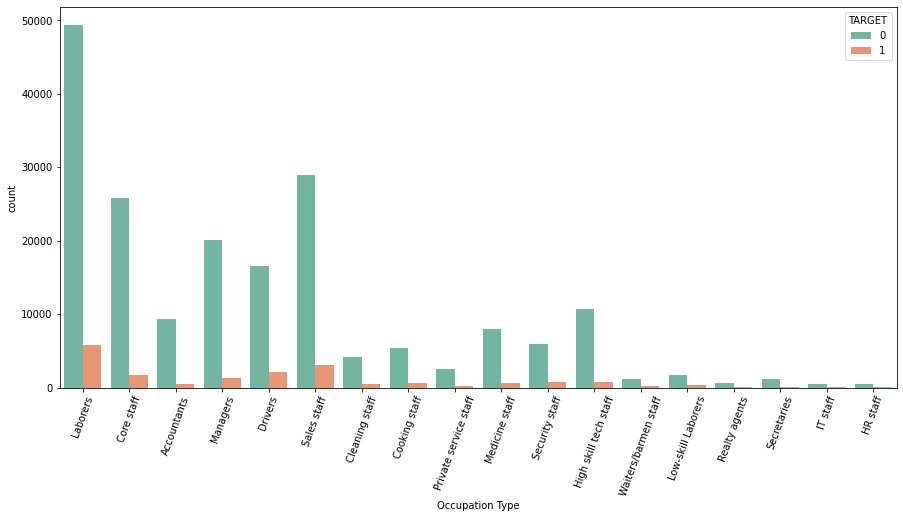

In [26]:
fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(x='OCCUPATION_TYPE',hue='TARGET',data=credit,palette="Set2")
plt.xticks(rotation=70)
plt.xlabel("Occupation Type")

It seems as if the labourers have the highest difficulty in repaying. Also it seems lending to Reality agents, IT staff, HR staff is the safest.

This is not a better way to conclude, because this contains baised number of applicants. A better way is to find a metric that incorporates relative relationship between applicants count and repayers count.

# Let us look at the number of repayer's to number of applicants ratio in every occupation category.

In [27]:
# get the number of people having occupation type and target grouped.
Occupation_df = pd.DataFrame(data=credit.groupby(['OCCUPATION_TYPE','TARGET']).count()['SK_ID_CURR'])

In [28]:
# reset the multiindex organization of dataframe.
Occupation_df = Occupation_df.reset_index() 

In [29]:
# get the number of people grouped on type of occupation and target in an array form.
value_counts = Occupation_df['SK_ID_CURR'].values

In [30]:
def repayers_to_applicants_ratio(values):
    """
    Finds the ratio of Repayers to Applicants. This kind of is a 
    measure for safety. Larger the value better the applicant - More 
    safe for the company to lend loan to this category of workers.
    
    values: array of entires whose counts are given
    returns the repayers to applicants ratio. 
    
    precondition: The counts are such that the targets alligned are
    in order 0 and 1
    """
    flag = 1
    ratios = []
    for count in range(len(values)):
        if flag == 1:
            current_number = values[count]
            next_number = values[count+1]
            ratios.append(current_number/(current_number+next_number))
            ratios.append(current_number/(current_number+next_number))
        flag=flag*-1
    return ratios 

In [31]:
# find the ratios from the array values
Occupation_df['Ratio R/A'] = repayers_to_applicants_ratio(value_counts)

# Repayment ratio based on Occupation Type.

In [32]:
# get the ratio and values based on the order of saftety.

Occupation_ratio_df = Occupation_df.groupby(['OCCUPATION_TYPE','Ratio R/A']).count().drop(['TARGET', 'SK_ID_CURR'],axis=1)
Occupation_ratio_df = Occupation_ratio_df.reset_index() 
Occupation_ratio_df = Occupation_ratio_df.sort_values(['Ratio R/A'],ascending=False)
Occupation_ratio_df

,OCCUPATION_TYPE,Ratio R/A
0,Accountants,0.951697
6,High skill tech staff,0.938401
10,Managers,0.937860
3,Core staff,0.936960
5,HR staff,0.936057
7,IT staff,0.935361
12,Private service staff,0.934012
11,Medicine staff,0.932998
15,Secretaries,0.929502
13,Realty agents,0.921438


Text(0, 0.5, 'Mean R/A Ratio')

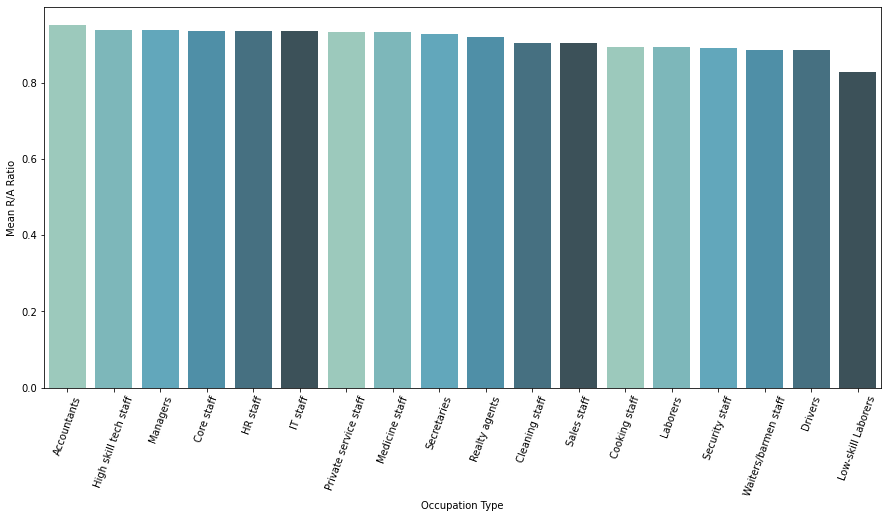

In [33]:
# applicants ratio.
fig,ax = plt.subplots(figsize = (15,7))
sns.barplot(x='OCCUPATION_TYPE',y='Ratio R/A',data=Occupation_ratio_df,palette=sns.color_palette("GnBu_d"))
plt.xticks(rotation=70)
plt.xlabel("Occupation Type")
plt.ylabel("Mean R/A Ratio")

According to the ratio of Number of repayers to Number of applicants in every occupation type, we see that it is most safe to lend money to Accountants with an R/A ratio of 0.9516 and it is least safe to lend money to low skilled labourers with an R/A ratio of 0.8284.

# How is the distribution of males and females in terms of loan safety given that they belong to a specific occupation?

In [34]:
# merge the new column 'Ratio R/A' to the credit dataframe.
credit = pd.merge(left=credit,right=Occupation_ratio_df,on='OCCUPATION_TYPE')

Text(0.5, 0, 'Gender')

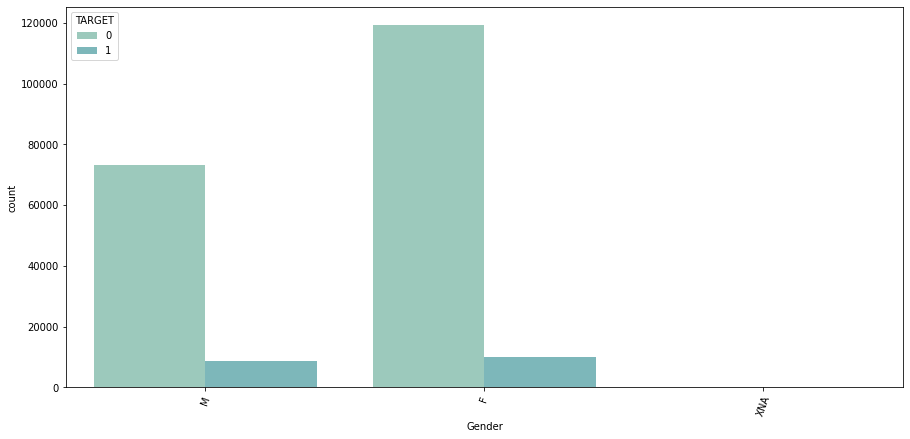

In [35]:
# Find out what is the probability that an applicant will return given that he/she is a male/Female respectively.
fig,ax = plt.subplots(figsize = (15,7))
sns.countplot(x='CODE_GENDER',data=credit,hue='TARGET',palette=sns.color_palette("GnBu_d"))
plt.xticks(rotation=70)
plt.xlabel("Gender")

In [36]:
pd.DataFrame(credit.groupby(['CODE_GENDER','TARGET']).count()['SK_ID_CURR']).reset_index()

,CODE_GENDER,TARGET,SK_ID_CURR
0,F,0,119311
1,F,1,9971
2,M,0,73260
3,M,1,8576
4,XNA,0,2


In [37]:
### To find out the probability here's what we have to do:
print("probability that an applicant will repay the given that he is a male P(R|M): 73260/(73260+8576) = 0.8952") 
print("probability that an applicant will repay the given that she is a female P(R|F): 119311/(119311+9971) = 0.9228")

probability that an applicant will repay the given that he is a male P(R|M): 73260/(73260+8576) = 0.8952
probability that an applicant will repay the given that she is a female P(R|F): 119311/(119311+9971) = 0.9228


In [38]:
# Let us create a new dataframe where the probabilites of repaying based on gender is included. GR/A stands
# for Gender based repayment ratio.
gender_repay_ratio = pd.DataFrame({"CODE_GENDER":['M','F'],"GR/A":[0.8952,0.9228]})

In [39]:
# Merge this dataframe with the old train dataframe
credit = pd.merge(left=credit,right=gender_repay_ratio,on='CODE_GENDER')

In [40]:
# lets create a new column that's indicative of repayment with gender and occupation type which is just the product of Ratio R/A with G R/A.
# EGR/A stands for employment gender repayment ratio.
credit['EGR/A'] = credit['Ratio R/A']*credit['GR/A']

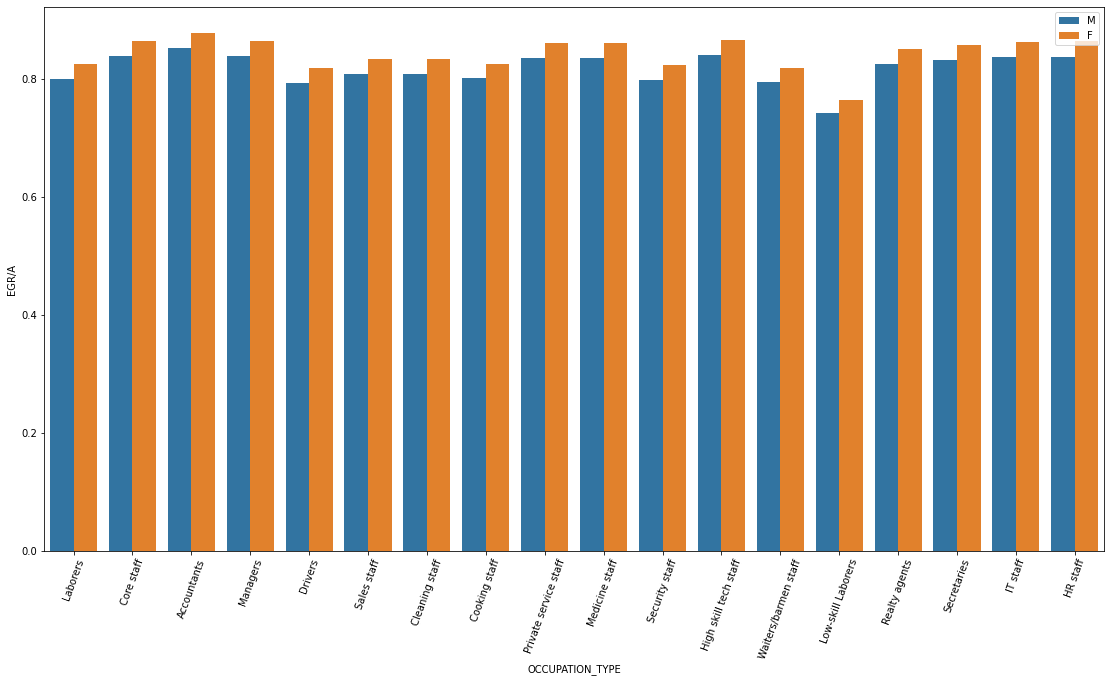

In [41]:
fig,ax = plt.subplots(figsize = (19,10))
plt.xticks(rotation=70)
sns.barplot(x='OCCUPATION_TYPE',y='EGR/A',hue='CODE_GENDER',data=credit)
plt.legend(loc=1)

So, in every occupation type, females are more likely to repay the loan on time.

# Which occupation category has the highest number of kids?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Laborers'),
  Text(1, 0, 'Core staff'),
  Text(2, 0, 'Accountants'),
  Text(3, 0, 'Managers'),
  Text(4, 0, 'Drivers'),
  Text(5, 0, 'Sales staff'),
  Text(6, 0, 'Cleaning staff'),
  Text(7, 0, 'Cooking staff'),
  Text(8, 0, 'Private service staff'),
  Text(9, 0, 'Medicine staff'),
  Text(10, 0, 'Security staff'),
  Text(11, 0, 'High skill tech staff'),
  Text(12, 0, 'Waiters/barmen staff'),
  Text(13, 0, 'Low-skill Laborers'),
  Text(14, 0, 'Realty agents'),
  Text(15, 0, 'Secretaries'),
  Text(16, 0, 'IT staff'),
  Text(17, 0, 'HR staff')])

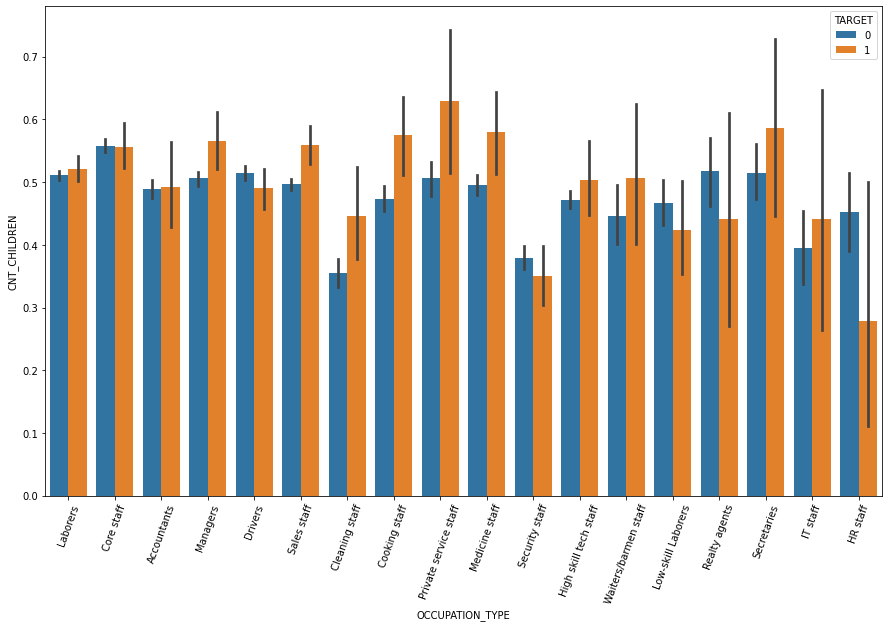

In [42]:
fig, ax = plt.subplots(figsize=(15,9))
sns.barplot(x='OCCUPATION_TYPE',y='CNT_CHILDREN',hue='TARGET',data=credit)
plt.xticks(rotation=70)

private service staff have the highest number of kids and thus have the highest difficulty in repaying because of kids - presumably

# Which occupation category are the highest loan recipients?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Laborers'),
  Text(1, 0, 'Core staff'),
  Text(2, 0, 'Accountants'),
  Text(3, 0, 'Managers'),
  Text(4, 0, 'Drivers'),
  Text(5, 0, 'Sales staff'),
  Text(6, 0, 'Cleaning staff'),
  Text(7, 0, 'Cooking staff'),
  Text(8, 0, 'Private service staff'),
  Text(9, 0, 'Medicine staff'),
  Text(10, 0, 'Security staff'),
  Text(11, 0, 'High skill tech staff'),
  Text(12, 0, 'Waiters/barmen staff'),
  Text(13, 0, 'Low-skill Laborers'),
  Text(14, 0, 'Realty agents'),
  Text(15, 0, 'Secretaries'),
  Text(16, 0, 'IT staff'),
  Text(17, 0, 'HR staff')])

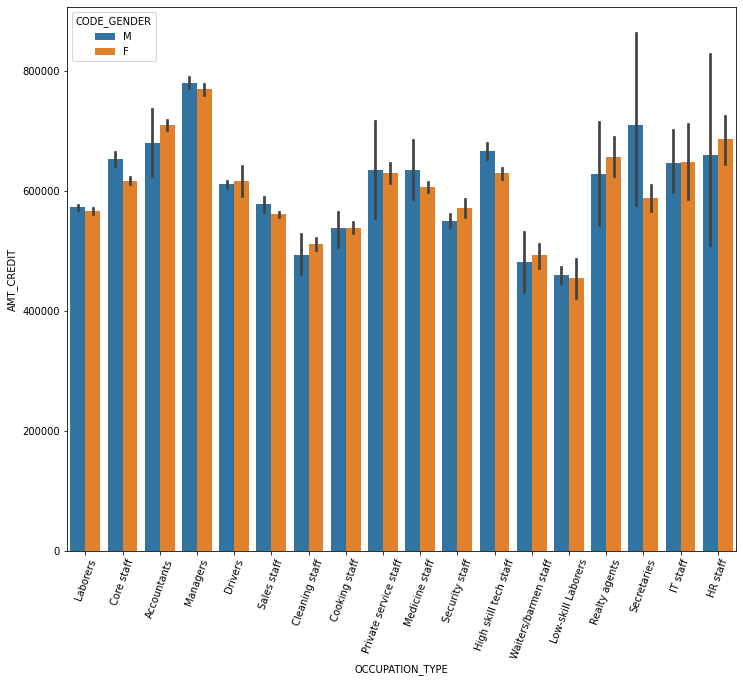

In [43]:
plt.figure(figsize=(12,10))
sns.barplot(x='OCCUPATION_TYPE',y='AMT_CREDIT',data=credit,hue='CODE_GENDER')
plt.xticks(rotation=70)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Laborers'),
  Text(1, 0, 'Core staff'),
  Text(2, 0, 'Accountants'),
  Text(3, 0, 'Managers'),
  Text(4, 0, 'Drivers'),
  Text(5, 0, 'Sales staff'),
  Text(6, 0, 'Cleaning staff'),
  Text(7, 0, 'Cooking staff'),
  Text(8, 0, 'Private service staff'),
  Text(9, 0, 'Medicine staff'),
  Text(10, 0, 'Security staff'),
  Text(11, 0, 'High skill tech staff'),
  Text(12, 0, 'Waiters/barmen staff'),
  Text(13, 0, 'Low-skill Laborers'),
  Text(14, 0, 'Realty agents'),
  Text(15, 0, 'Secretaries'),
  Text(16, 0, 'IT staff'),
  Text(17, 0, 'HR staff')])

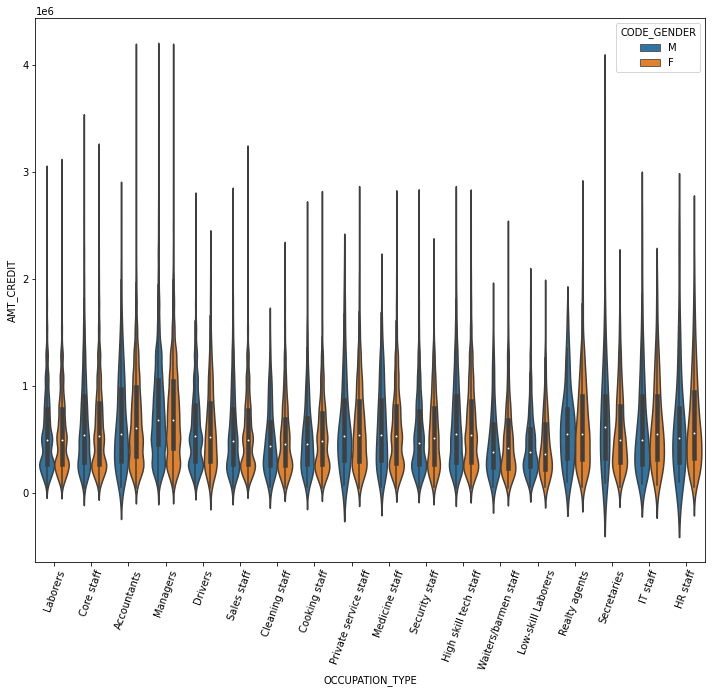

In [44]:
plt.figure(figsize=(12,10))
sns.violinplot(x='OCCUPATION_TYPE',y='AMT_CREDIT',data=credit,hue='CODE_GENDER')
plt.xticks(rotation=70)

Accountants and Managers are the highest amount (facevalue) recipents, while low skilled laborers are the least recipents (let me make it clear- labourers are highest volume based applicants, but not large (facevalue) recipents ). It makes sense because accountants are more likely to get a large credit approved as opposed to low skilled laborers - which was kinda explained in the Ratio R/A in Sec 3.31

# How many clients have real estate?

<AxesSubplot:xlabel='FLAG_OWN_REALTY', ylabel='count'>

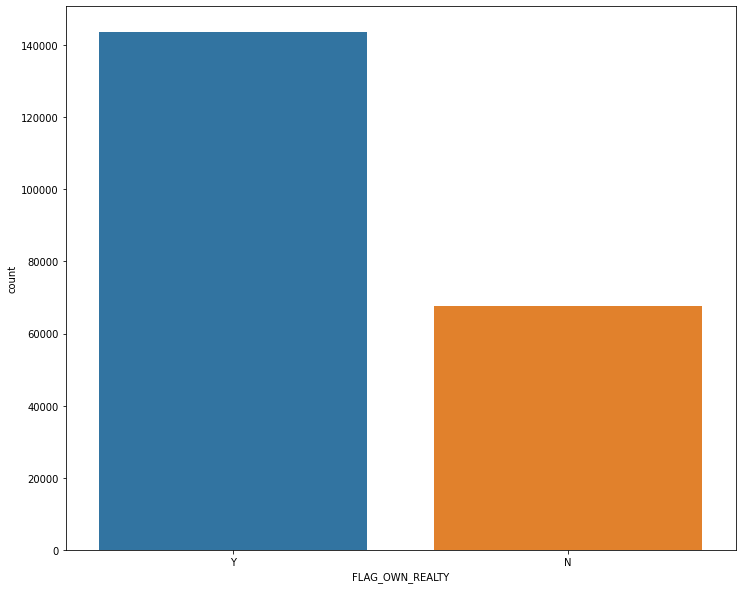

In [45]:
plt.figure(figsize=(12,10))
sns.countplot(x='FLAG_OWN_REALTY', data=credit)

wow, alot of people have real estate

# How does having real estate influence repaying?

<AxesSubplot:xlabel='TARGET', ylabel='count'>

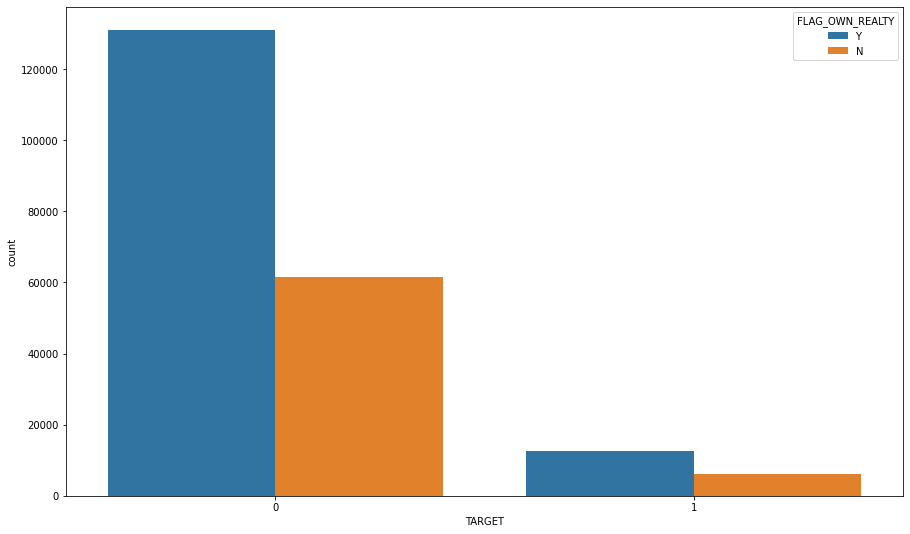

In [46]:
fig, ax = plt.subplots(figsize=(15,9))
sns.countplot(x='TARGET',hue='FLAG_OWN_REALTY',data=credit)

In [47]:
reality_with_difficulty = len(credit[(credit['FLAG_OWN_REALTY']=='Y') & (credit['TARGET']==1)])
reality_without_difficulty = len(credit[(credit['FLAG_OWN_REALTY']=='Y') & (credit['TARGET']==0)])
no_reality_with_difficulty = len(credit[(credit['FLAG_OWN_REALTY']=='N') & (credit['TARGET']==1)])
no_reality_without_difficulty = len(credit[(credit['FLAG_OWN_REALTY']=='N') & (credit['TARGET']==0)])

In [48]:
print("Defaulters with realestate % = ",100*reality_with_difficulty/(reality_with_difficulty+reality_without_difficulty))
print("Defaulters without realestate % = ",100*no_reality_with_difficulty/(no_reality_with_difficulty+no_reality_without_difficulty))

Defaulters with realestate % =  8.728533823590858
Defaulters without realestate % =  8.905509478672986


Surprisingly, more defaulters are those who don't have realestate!

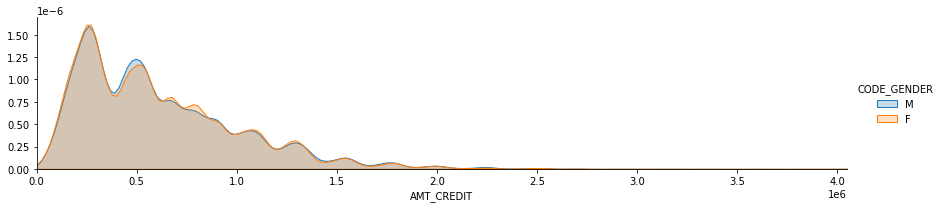

In [49]:
fig = sns.FacetGrid(credit, hue='CODE_GENDER',aspect=4)

fig.map(sns.kdeplot,'AMT_CREDIT',shade= True)

oldest = credit['AMT_CREDIT'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

# PART TWO

# predictive analysis

first, lets do some encoding of our categorical labels.

In [50]:
credit.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Ratio R/A,GR/A,EGR/A
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.0,0.069,0.0833,0.125,0.0369,0.0202,0.019,0.0,0.0,0.0252,0.0383,0.9722,0.6341,0.0144,0.0,0.069,0.0833,0.125,0.0377,0.022,0.0198,0.0,0.0,0.025,0.0369,0.9722,0.6243,0.0144,0.0,0.069,0.0833,0.125,0.0375,0.0205,0.0193,0.0,0.0,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.894212,0.8952,0.800499
1,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.894212,0.8952,0.800499
2,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,NaN,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,NaN,0.354225,0.621226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,

In [51]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [52]:
credit_encode = credit
encoder=LabelEncoder()

In [53]:
credit_encode['NAME_CONTRACT_TYPE'] = encoder.fit_transform(credit_encode['NAME_CONTRACT_TYPE'], inplace=True)
credit_encode['NAME_HOUSING_TYPE'] = encoder.fit_transform(credit_encode['NAME_HOUSING_TYPE'])
credit_encode['NAME_FAMILY_STATUS'] = encoder.fit_transform(credit_encode['NAME_FAMILY_STATUS'])
credit_encode['NAME_EDUCATION_TYPE'] = encoder.fit_transform(credit_encode['NAME_EDUCATION_TYPE'])
credit_encode['NAME_INCOME_TYPE'] = encoder.fit_transform(credit_encode['NAME_INCOME_TYPE'])
credit_encode['FLAG_OWN_REALTY'] = encoder.fit_transform(credit_encode['FLAG_OWN_REALTY'])
credit_encode['FLAG_OWN_CAR'] = encoder.fit_transform(credit_encode['FLAG_OWN_CAR'])
credit_encode['CODE_GENDER'] = encoder.fit_transform(credit_encode['CODE_GENDER'])
credit_encode['ORGANIZATION_TYPE'] = encoder.fit_transform(credit_encode['ORGANIZATION_TYPE'])
credit_encode['WEEKDAY_APPR_PROCESS_START'] = encoder.fit_transform(credit_encode['WEEKDAY_APPR_PROCESS_START'])
credit_encode['NAME_CONTRACT_TYPE'] = encoder.fit_transform(credit_encode['NAME_CONTRACT_TYPE'])
credit_encode['OCCUPATION_TYPE'] = encoder.fit_transform(credit_encode['OCCUPATION_TYPE'])
credit_encode['NAME_TYPE_SUITE'] = encoder.fit_transform(credit_encode['NAME_TYPE_SUITE'])

In [54]:
credit.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Ratio R/A,GR/A,EGR/A
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,6,6,4,3,1,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,8,1.0,2,2,6,10,0,0,0,0,0,0,5,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.0,0.069,0.0833,0.125,0.0369,0.0202,0.019,0.0,0.0,0.0252,0.0383,0.9722,0.6341,0.0144,0.0,0.069,0.0833,0.125,0.0377,0.022,0.0198,0.0,0.0,0.025,0.0369,0.9722,0.6243,0.0144,0.0,0.069,0.0833,0.125,0.0375,0.0205,0.0193,0.0,0.0,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.894212,0.8952,0.800499
1,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,6,6,4,3,1,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,8,1.0,2,2,1,9,0,0,0,0,0,0,11,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.894212,0.8952,0.800499
2,100008,0,0,1,0,1,0,99000.0,490495.5,27517.5,454500.0,5,4,4,1,1,0.035792,-16941,-1588,-4970.0,-477,NaN,1,1,1,1,1,0,8,2.0,2,2,6,16,0,0,0,0,0,0,33,NaN,0.354225,0.621226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.894212,0.8952,0.800499
3,100012,0,1,1,0,1,0,135000.0,405000.0,20250.0,405000.0,6,6,4,3,1,0.019689,-14469,-2019,-14437.0,-3992,NaN,1,1,0,1,0,0,8,1.0,2,2,4,8,0,0,0,0,0,0,9,NaN,0.746644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

# now lets drop all entries with over 47% of missing value

In [55]:
credit.drop(['EMERGENCYSTATE_MODE', 'TOTALAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI',
            'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_MODE', 'FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'HOUSETYPE_MODE', 
            'LIVINGAREA_AVG', 'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'ENTRANCES_MEDI', 'ENTRANCES_AVG',
            'ENTRANCES_MODE', 'APARTMENTS_AVG', 'APARTMENTS_MEDI', 'APARTMENTS_MODE', 'WALLSMATERIAL_MODE', 'ELEVATORS_AVG', 
             'ELEVATORS_MODE', 'ELEVATORS_MEDI', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_MEDI',
             'EXT_SOURCE_1', 'BASEMENTAREA_MODE', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MEDI', 'LANDAREA_MODE', 'LANDAREA_MEDI', 
             'LANDAREA_AVG',  'YEARS_BUILD_AVG', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE', 'FLOORSMIN_AVG', 
             'FLOORSMIN_MEDI', 'FLOORSMIN_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_MODE', 
             'FONDKAPREMONT_MODE', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MEDI', 
             'COMMONAREA_MODE',  'COMMONAREA_AVG', 'COMMONAREA_MEDI', 'OWN_CAR_AGE', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR' ],
            axis=1,inplace=True)

In [56]:
credit.shape

(211118, 74)

In [57]:
credit.tail(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,Ratio R/A,GR/A,EGR/A
211108,449647,0,0,0,0,1,0,90000.0,415408.5,49428.0,373500.0,6,1,4,1,1,0.035792,-21788,-780,-15273.0,-5169,1,1,0,1,0,0,5,2.0,2,2,1,15,0,0,0,0,0,0,5,0.583777,0.190706,2.0,1.0,2.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.936057,0.9228,0.863793
211109,450831,0,0,0,1,1,2,135000.0,900000.0,26446.5,900000.0,6,1,4,1,1,0.015221,-15786,-2225,-12714.0,-335,1,1,0,1,0,0,5,4.0,2,2,4,8,0,0,0,0,0,0,5,0.612239,NaN,5.0,0.0,5.0,0.0,-1446.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.936057,0.9228,0.863793
211110,451046,0,0,0,0,1,1,202500.0,1288350.0,41692.5,1125000.0,6,1,1,1,1,0.046220,-15371,-2652,-1860.0,-1876,1,1,0,1,0,0,5,3.0,1,1,5,10,0,0,0,0,1,1,5,0.328042,0.187389,0.0,0.0,0.0,0.0,-151.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,4.0,0.936057,0.9228,0.863793
211111,451157,0,1,0,0,1,1,135000.0,225000.0,11250.0,225000.0,6,1,1,1,1,0.005084,-10363,-370,-4341.0,-1551,1,1,1,1,0,0,5,3.0,2,2,2,17,1,1,0,1,1,0,5,0.650546,0.528093,2.0,0.0,2.0,0.0,-139.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.936057,0.9228,0.863793
211112,452211,0,0,0,0,0,0,193500.0,149256.0,15669.0,135000.0,6,1,4,0,2,0.007330,-12508,-937,-9310.0,-4960,1,1,0,1,1,0,5,2.0,2,2,0,11,1,1,0,1,1,0,5,0.566010,0.097582,0.0,0.0,0.0,0.0,-819.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.936057,0.9228,0.863793
211113,453306,0,1,0,1,0,0,81000.0,180000.0,9000.0,180000.0,6,4,2,1,3,0.007020,-8785,-170,-1656.0,-1416,1,1,0,1,0,0,5,2.0,2,2,1,16,0,0,0,0,0,0,11,0.669072,0.046310,7.0,0.0,7.0,0.0,-559.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.936057,0.9228,0.863793
211114,453456,0,0,0,0,0,0,135000.0,675000.0,17937.0,675000.0,6,1,1,2,1,0.031329,-11712,-4822,-2654.0,-4141,1,1,0,1,1,1,5,1.0,2,2,5,10,0,0,0,0,1,1,5,0.808903,0.404878,4.0,0.0,4.0,0.0,-1787.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.936057,0.9228,0.863793
211115,454388,0,0,0,0,1,1,225000.0,491823.0,25240.5,373500.0,1,6,1,1,1,0.018801,-13576,-222,-226.0,-4626,1,1,0,1,0,0,5,3.0,2,2,3,12,0,0,0,1,1,0,5,0.512152,0.719491,4.0,0.0,4.0,0.0,-820.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.936057,0.9228,0.863793
211116,454756,0,1,0,0,0,0,81000.0,180000.0,9000.0,180000.0,6,4,1,3,2,0.006671,-8618,-564,-1651.0,-183,1,1,0,1,0,0,5,1.0,2,2,4,14,0,0,0,0,0,0,33,0.629501,0.307737,1.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.936057,0.9228,0.863793
211117,455325,0,0,0,0,1,0,162000.0,450000.0,14373.0,450000.0,6,1,1,1,1,0.010500,-22968,-485,-2933.0,-4919,1,1,0,1,0,0,5,2.0,3,3,1,10,0,0,0,0,0,0,5,0.542769,0.441836,3.0,0.0,3.0,0.0,-639.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.936057,0.9228,0.863793


In [58]:
credit.fillna((0), inplace=True)


In [59]:
credit.isnull().sum()

# Checking if there is anything left out

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
Ratio R/A                     0
GR/A                          0
EGR/A                         0
Length: 74, dtype: int64

In [60]:
from pandas import Series,DataFrame
from numpy.random import randn
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import RFE  

from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn import metrics


import math
from sklearn import tree

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

import sklearn.datasets 

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.feature_selection import RFE   # Recursive Feature Elimination
from sklearn.svm import SVR                 # Support Vector Regression
import sklearn
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

from sklearn.feature_selection import RFE   # Recursive Feature Elimination
from sklearn.svm import SVR                 # Support Vector Regression
from sklearn.svm import SVC

In [61]:
credit.drop(columns=['Ratio R/A', 'GR/A', 'EGR/A'], inplace=True)


In [62]:
X=credit[['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'CNT_CHILDREN', 
         'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 
          'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 
         'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
          'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
         'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
         'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
         'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 
         'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 
         'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 
          'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 
          'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 
          'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 
          'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON']]
y=credit[['TARGET']]

In [63]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)

from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X)

array([[-1.48972926e+00, -1.88872886e+00,  8.30639898e-01, ...,
         2.18341398e-03, -3.81343917e-15, -1.49262046e-15],
       [-1.09818668e+00, -2.51355406e+00, -1.34759633e+00, ...,
        -1.55963322e-03, -6.70903374e-15,  1.91636928e-16],
       [ 6.33471889e-01, -1.19073773e+00,  3.33472245e-01, ...,
        -8.01770907e-04, -3.10783768e-15, -1.08547906e-15],
       ...,
       [-1.24357087e+00,  1.51673273e+00, -2.84806040e-01, ...,
        -1.43220444e-02,  3.50676699e-18, -4.33286622e-18],
       [-1.56063554e+00, -2.29666708e+00, -2.06002406e+00, ...,
        -5.29653048e-03, -3.89962279e-17,  6.96010364e-20],
       [-9.41347709e-01, -1.75961886e+00,  1.55755004e+00, ...,
        -8.93655399e-03,  1.15831320e-17, -5.09436098e-18]])

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)

# DecisionTreeClassifier

In [65]:
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(criterion = 'entropy', random_state=100, max_depth=3, min_samples_leaf= 5)

dtree_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [66]:
y_pred = dtree_model.predict(X_test)


In [67]:
print("Testing Accuracy :", dtree_model.score(X_test, y_test))
print("Training Accuracy :", dtree_model.score(X_train,y_train))

Testing Accuracy : 0.9142194012883668
Training Accuracy : 0.9116309637997797


# confusion_matrix

In [68]:
from sklearn.metrics import confusion_matrix

Y_pred = dtree_model.predict(X_test)
Y_pred = [ 1 if y>=0.5 else 0 for y in Y_pred]

In [69]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)
print(cm)

[[38602     0]
 [ 3622     0]]


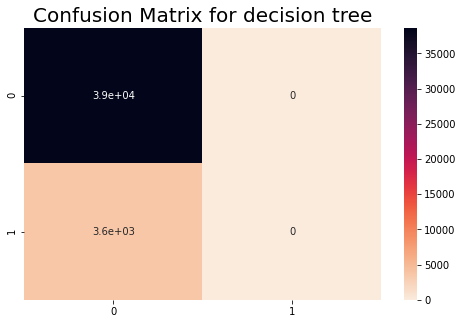

In [70]:
# plottinhg the confusion matrix

plt.rcParams['figure.figsize'] = (8, 5)
sns.heatmap(cm, annot = True, cmap = 'rocket_r')
plt.title('Confusion Matrix for decision tree', fontweight = 30, fontsize = 20)
plt.show()

# decision tree classification report

In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.96     38602
           1       0.00      0.00      0.00      3622

    accuracy                           0.91     42224
   macro avg       0.46      0.50      0.48     42224
weighted avg       0.84      0.91      0.87     42224



# Optimal Probability Thresholds with ROC Curve

In [72]:
dt_y_prob = dtree_model.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(dt_y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
dtree_model.score(X_test, y_pred)

1.0

In [73]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, dt_y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6868484475259576

Text(0.5, 0, 'False Positive Rate')

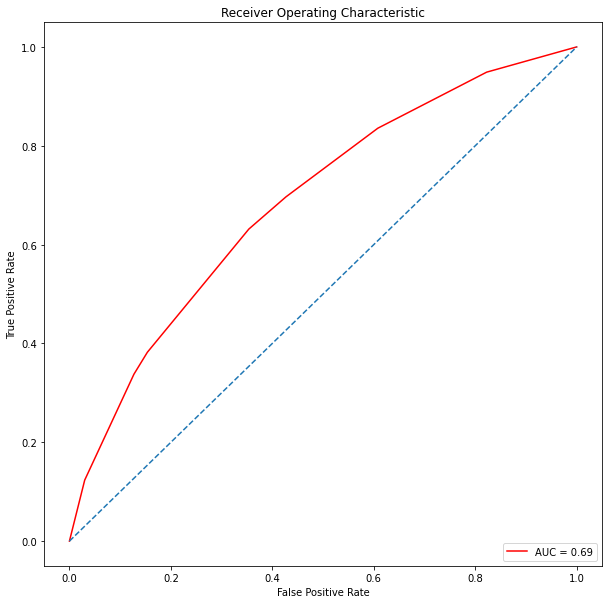

In [74]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# LogisticRegression model

In [75]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression()

In [76]:
y_pred = log_model.predict(X_test)


In [77]:
print("Testing Accuracy :", log_model.score(X_test, y_test))
print("Training Accuracy :", log_model.score(X_train,y_train))

Testing Accuracy : 0.9141720348616901
Training Accuracy : 0.9115125463308347


# confusion_matrix

In [78]:
Y_pred = log_model.predict(X_test)
Y_pred = [ 1 if y>=0.5 else 0 for y in Y_pred]

In [79]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)
print(cm)

[[38587    15]
 [ 3609    13]]


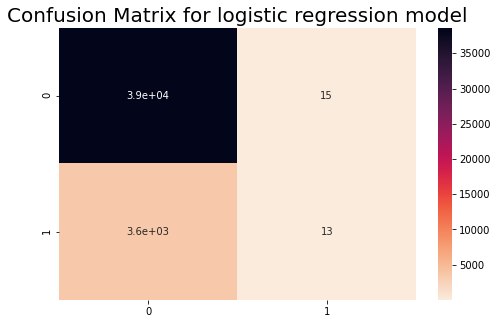

In [80]:
# plottinhg the confusion matrix

plt.rcParams['figure.figsize'] = (8, 5)
sns.heatmap(cm, annot = True, cmap = 'rocket_r')
plt.title('Confusion Matrix for logistic regression model', fontweight = 30, fontsize = 20)
plt.show()

# log model classification report

In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.96     38602
           1       0.46      0.00      0.01      3622

    accuracy                           0.91     42224
   macro avg       0.69      0.50      0.48     42224
weighted avg       0.88      0.91      0.87     42224



# Optimal Probability Thresholds with ROC Curve

In [82]:
log_y_prob = log_model.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(log_y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
log_model.score(X_test, y_pred)

1.0

In [83]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, log_y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7251171257080462

Text(0.5, 0, 'False Positive Rate')

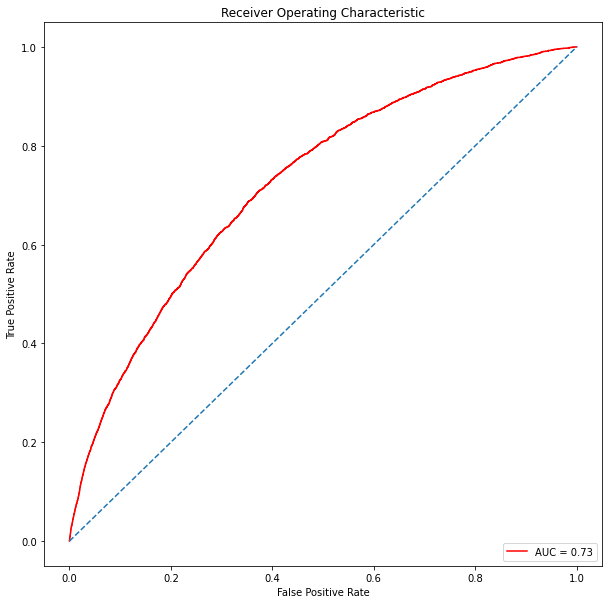

In [84]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# RandomForestClassifier model

In [85]:
r_forset_model = RandomForestClassifier()
r_forset_model.fit(X_train,y_train)

RandomForestClassifier()

In [86]:
y_pred = r_forset_model.predict(X_test)


In [87]:
print("Training Accuracy :", r_forset_model.score(X_train,y_train))

print("Testing Accuracy :", r_forset_model.score(X_test, y_test))

Training Accuracy : 0.9999703956327638
Testing Accuracy : 0.914290450928382


# confusion_matrix

In [88]:
Y_pred = r_forset_model.predict(X_test)
Y_pred = [ 1 if y>=0.5 else 0 for y in Y_pred]

In [89]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)
print(cm)

[[38601     1]
 [ 3618     4]]


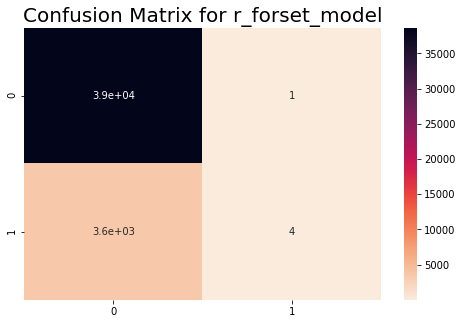

In [90]:
# plottinhg the confusion matrix

plt.rcParams['figure.figsize'] = (8, 5)
sns.heatmap(cm, annot = True, cmap = 'rocket_r')
plt.title('Confusion Matrix for r_forset_model', fontweight = 30, fontsize = 20)
plt.show()

# r_forest model classification report

In [91]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.96     38602
           1       0.80      0.00      0.00      3622

    accuracy                           0.91     42224
   macro avg       0.86      0.50      0.48     42224
weighted avg       0.90      0.91      0.87     42224



# Optimal Probability Thresholds with ROC Curve

In [92]:
forest_y_prob = r_forset_model.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(forest_y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
r_forset_model.score(X_test, y_pred)

1.0

In [93]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, forest_y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7090237397254933

Text(0.5, 0, 'False Positive Rate')

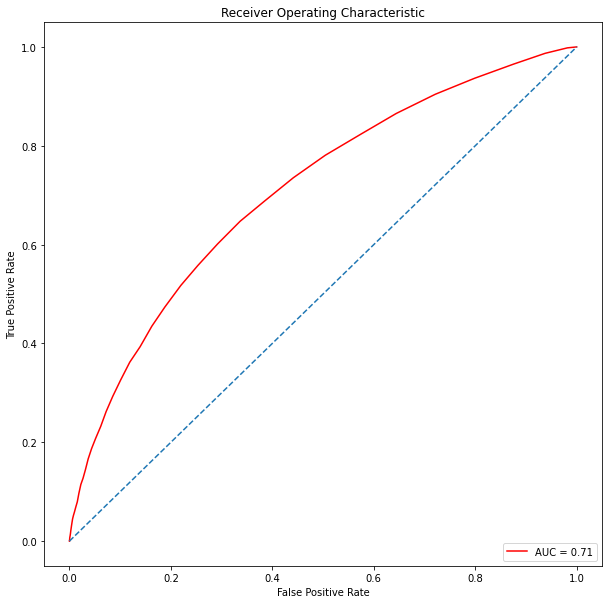

In [94]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# naive_bayes_model

In [98]:
naive_bayes_model = GaussianNB()


naive_bayes_model.fit(X_train,y_train)

GaussianNB()

In [99]:
y_pred = naive_bayes_model.predict(X_test)

In [100]:
print("Training Accuracy :", naive_bayes_model.score(X_train,y_train))

print("Testing Accuracy :", naive_bayes_model.score(X_test, y_test))

Training Accuracy : 0.12339100264070955
Testing Accuracy : 0.1209975369458128


# confusion_matrix

In [101]:
Y_pred = naive_bayes_model.predict(X_test)
Y_pred = [ 1 if y>=0.5 else 0 for y in Y_pred]

In [102]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)
print(cm)

[[ 1560 37042]
 [   73  3549]]


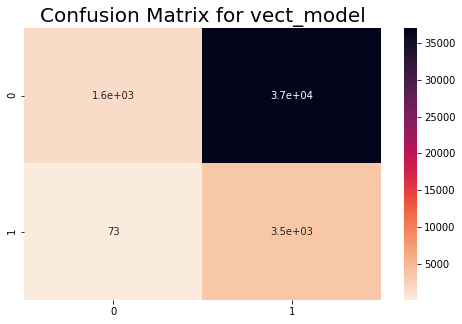

In [103]:
# plottinhg the confusion matrix

plt.rcParams['figure.figsize'] = (8, 5)
sns.heatmap(cm, annot = True, cmap = 'rocket_r')
plt.title('Confusion Matrix for vect_model', fontweight = 30, fontsize = 20)
plt.show()

# naive_bayes_model classification report

In [104]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.04      0.08     38602
           1       0.09      0.98      0.16      3622

    accuracy                           0.12     42224
   macro avg       0.52      0.51      0.12     42224
weighted avg       0.88      0.12      0.08     42224



# Optimal Probability Thresholds with ROC Curve

In [105]:


naive_y_prob = naive_bayes_model.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(naive_y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
naive_bayes_model.score(X_test, y_pred)

1.0

In [106]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, naive_y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6606050894843242

Text(0.5, 0, 'False Positive Rate')

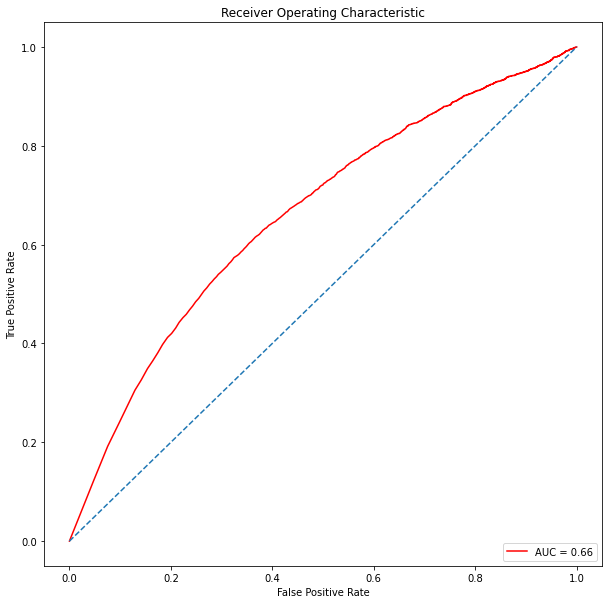

In [107]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# KNeighborsClassifier 
kneighbors was taking too much time to train. so i had to mark the code down.

knn_model = KNeighborsClassifier(n_neighbors = 6)
knn_model.fit(X_train,y_train)

y_pred = knn_model.predict(X_test)


print("Training Accuracy :", knn_model.score(X_train,y_train))

print("Testing Accuracy :", knn_model.score(X_test, y_test))

# confusion_matrix

Y_pred =  knn_model.predict(X_test)
Y_pred = [ 1 if y>=0.5 else 0 for y in Y_pred]

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)
print(cm)

# plottinhg the confusion matrix

plt.rcParams['figure.figsize'] = (8, 5)
sns.heatmap(cm, annot = True, cmap = 'rocket_r')
plt.title('Confusion Matrix for knn_model', fontweight = 30, fontsize = 20)
plt.show()

# KNeighbors model classification report

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

# Optimal Probability Thresholds with ROC Curve


knn_y_prob = knn_model.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(knn_y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
knn_model.score(X_test, y_pred)

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# MLPClassifier model
#A multilayer perceptron (MLP) is a class of feedforward artificial neural network (ANN). ... MLP utilizes a supervised learning technique called backpropagation for training. Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable.

In [108]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()

In [109]:
mlp.fit(X_train,y_train)

MLPClassifier()

In [110]:
y_pred = mlp.predict(X_test)


In [111]:
print("Training Accuracy :", mlp.score(X_train,y_train))

print("Testing Accuracy :", mlp.score(X_test, y_test))

Training Accuracy : 0.9138157661018154
Testing Accuracy : 0.9101458885941645


# confusion_matrix

In [112]:
Y_pred =  mlp.predict(X_test)
Y_pred = [ 1 if y>=0.5 else 0 for y in Y_pred]

In [113]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)
print(cm)

[[38334   268]
 [ 3526    96]]


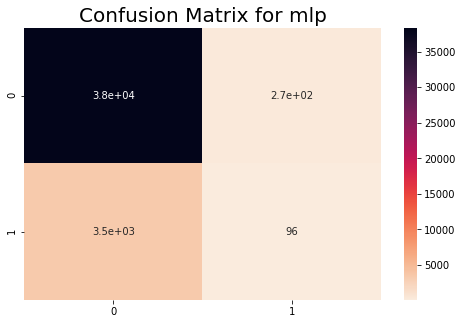

In [114]:
# plottinhg the confusion matrix

plt.rcParams['figure.figsize'] = (8, 5)
sns.heatmap(cm, annot = True, cmap = 'rocket_r')
plt.title('Confusion Matrix for mlp', fontweight = 30, fontsize = 20)
plt.show()

# mlp classification report

In [115]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     38602
           1       0.26      0.03      0.05      3622

    accuracy                           0.91     42224
   macro avg       0.59      0.51      0.50     42224
weighted avg       0.86      0.91      0.88     42224



# Optimal Probability Thresholds with ROC Curve

In [116]:

mlp_y_prob = mlp.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(mlp_y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
mlp.score(X_test, y_pred)

1.0

In [117]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, mlp_y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6949109004660424

Text(0.5, 0, 'False Positive Rate')

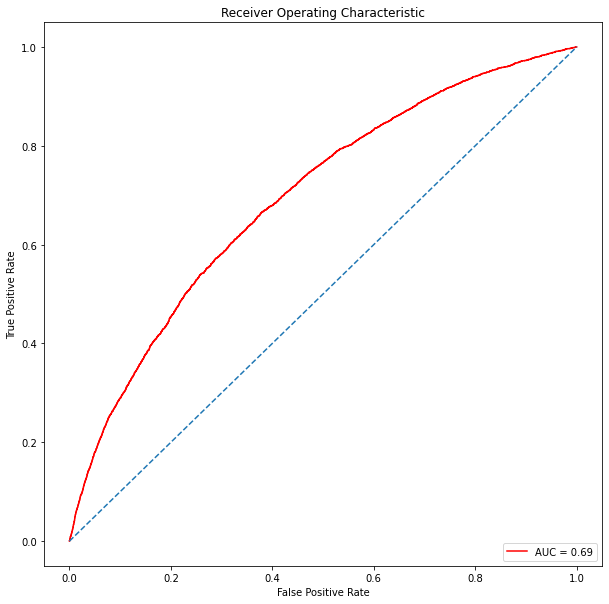

In [118]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [119]:
import keras 
from keras.layers import Dense
from keras.models import Sequential

In [125]:
ann  = Sequential()
ann.add(Dense(units= 32,bias_initializer= 'uniform', activation = 'relu', input_dim=71))
ann.add(Dense(units= 69,bias_initializer= 'uniform', activation = 'relu'))
ann.add(Dense(units= 1,bias_initializer= 'uniform', activation = 'sigmoid'))
ann.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [126]:
prediction = ann.fit(X_train,y_train, batch_size=2, epochs=2,verbose= 1)


Epoch 1/2
84447/84447 [==============================] - 368s 4ms/step - loss: 0.0769 - accuracy: 0.9116
Epoch 2/2
84447/84447 [==============================] - ETA: 0s - loss: 0.0760 - accuracy: 0.91 - 469s 6ms/step - loss: 0.0760 - accuracy: 0.9116


In [143]:
Y_pred = ann.predict(X_test)
Y_pred = [ 1 if y>=0.5 else 0 for y in Y_pred]

In [134]:
#now lets do a confusion matrix to determine the truth or the falsity in our prediction. 
#this will help us to determine whether to accept the model prediction or not.


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)
print(cm)

[[38602     0]
 [ 3622     0]]


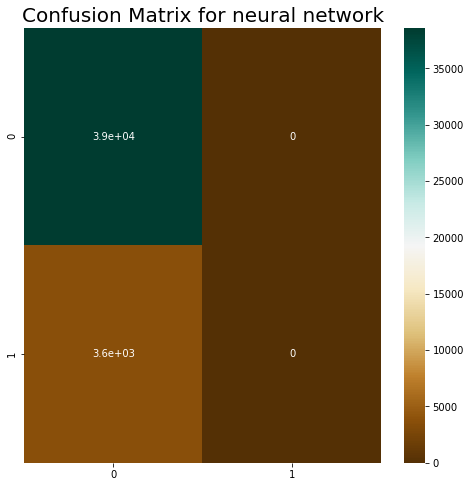

In [135]:
# printing the confusion matrix
plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot = True, cmap = 'BrBG')
plt.title('Confusion Matrix for neural network', fontweight = 30, fontsize = 20)
plt.show()

# neural network classification report

In [136]:
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.96     38602
           1       0.00      0.00      0.00      3622

    accuracy                           0.91     42224
   macro avg       0.46      0.50      0.48     42224
weighted avg       0.84      0.91      0.87     42224



In [140]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, mlp_y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc


0.6949109004660424

Text(0.5, 0, 'False Positive Rate')

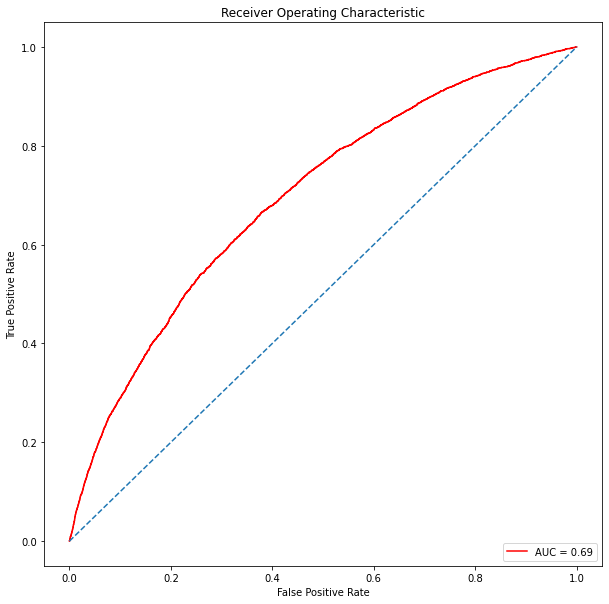

In [141]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# all predicted model auc score

In [146]:
print("dtree_model :", dtree_model.score(X_train,y_train))
print("log_model :", log_model.score(X_train,y_train))

print("r_forset_model :", r_forset_model.score(X_train,y_train))

print("naive_bayes_model :", naive_bayes_model.score(X_train,y_train))

print("mlp model:", mlp.score(X_train,y_train))

dtree_model : 0.9116309637997797
log_model : 0.9115125463308347
r_forset_model : 0.9999703956327638
naive_bayes_model : 0.12339100264070955
mlp model: 0.9138157661018154


# Computing ROC curve values

In [148]:
dtree_model = roc_auc_score(y_test, dt_y_prob)
log_model  = roc_auc_score(y_test, log_y_prob)
r_forset_model  = roc_auc_score(y_test, forest_y_prob)
naive_bayes_model  = roc_auc_score(y_test, naive_y_prob)
mlp_model= roc_auc_score(y_test, mlp_y_prob)

In [150]:
print('dtree_model: ROC = %.3f' % (dtree_model))
print('log_model: ROC = %.3f' % (log_model))
print('r_forset_model: ROC = %.3f' % (r_forset_model))
print('naive_bayes_model: ROC = %.3f' % (naive_bayes_model))
print('mlp_model: ROC = %.3f' % (mlp_model))

dtree_model: ROC = 0.687
log_model: ROC = 0.725
r_forset_model: ROC = 0.709
naive_bayes_model: ROC = 0.661
mlp_model: ROC = 0.695


# Calculate ROC curve

In [152]:
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_y_prob)
log_fpr, log_tpr, _ = roc_curve(y_test, log_y_prob)
forest_fpr, forest_tpr, _ = roc_curve(y_test, forest_y_prob)
naive_fpr, naive_tpr, _ = roc_curve(y_test, naive_y_prob)
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, mlp_y_prob)

# Plot the ROC curve

Text(0.5, 0, 'False Positive Rate')

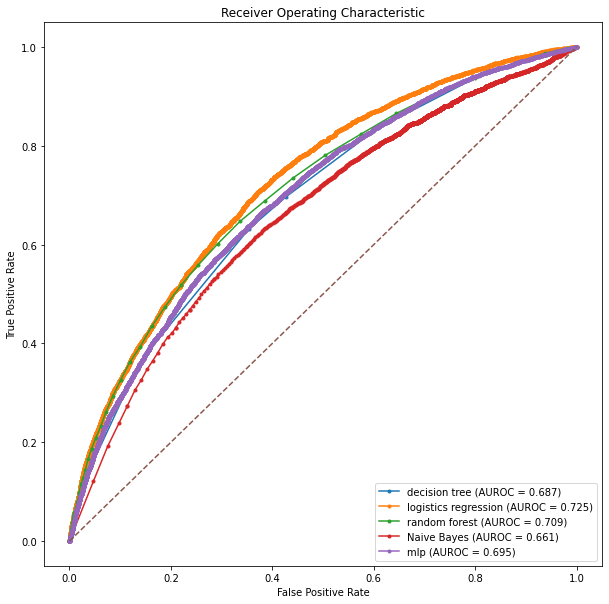

In [153]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')


plt.plot(dt_fpr, dt_tpr,   marker='.', label='decision tree (AUROC = %0.3f)' % dtree_model)
plt.plot(log_fpr, log_tpr, marker='.', label='logistics regression (AUROC = %0.3f)' % log_model)
plt.plot(forest_fpr, forest_tpr, marker='.', label='random forest (AUROC = %0.3f)' % r_forset_model)
plt.plot(naive_fpr, naive_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % naive_bayes_model)
plt.plot(mlp_fpr, mlp_tpr, marker='.', label='mlp (AUROC = %0.3f)' % mlp_model)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [154]:
credit.corr()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON
SK_ID_CURR,1.000000,-0.001957,0.001963,-0.001399,0.003016,-0.001745,-0.000297,-0.003442,-0.001504,-0.002755,-0.001204,-0.000357,-0.001758,-0.001273,0.001692,0.002331,0.000272,-0.001864,-0.000651,0.002269,-0.000320,NaN,0.001503,0.000469,0.003884,0.003793,-0.001766,0.001747,-0.000755,0.001646,0.001233,0.001609,-0.001781,0.000184,0.002941,0.004745,-0.002060,-0.001232,0.000138,0.002125,0.001649,0.000383,0.001147,0.003641,0.001122,0.004334,0.000785,0.001795,-0.003751,-0.004388,-0.000694,-0.001416,-0.004151,0.002970,0.001530,0.000187,-0.002415,-0.001263,0.002372,-0.000373,0.003914,-0.000419,0.000766,0.000795,-0.000787,-0.000030,0.001057,-0.003279,-0.001104,-0.000525,-0.000821
TARGET,-0.001957,1.000000,-0.035999,0.047621,-0.033856,-0.002916,0.008001,-0.005368,-0.040781,-0.019376,-0.050476,0.011215,0.033581,0.066001,0.003930,0.030572,-0.039621,0.065902,0.068157,0.037293,0.040006,NaN,-0.000078,0.019595,0.000619,-0.024819,-0.007116,0.021016,-0.001862,0.063884,0.066265,0.003188,-0.030124,0.005001,0.002475,-0.002089,0.043036,0.043161,0.023484,-0.002263,-0.170078,-0.122848,0.011129,0.035227,0.011009,0.033231,0.061376,0.006538,0.042256,-0.002702,-0.001680,-0.009391,-0.000723,-0.015537,-0.005055,-0.001654,-0.004528,-0.000955,-0.012796,-0.010554,-0.006958,-0.014224,-0.003867,-0.010355,-0.000948,-0.000569,0.004275,0.000128,0.000069,-0.001637,-0.017620
NAME_CONTRACT_TYPE,0.001963,-0.035999,1.000000,-0.021237,-0.006435,0.075288,0.019143,-0.008695,-0.241439,-0.269242,-0.207414,0.009181,-0.013414,-0.061496,0.030282,0.019324,0.028484,0.067238,0.036439,0.008926,0.040270,NaN,-0.006204,-0.047520,-0.102134,-0.017932,-0.014638,0.002785,-0.001094,-0.023067,-0.024569,-0.006364,0.033730,0.016995,0.010079,0.002040,0.007825,-0.011439,-0.019191,-0.006698,0.013251,-0.010598,-0.022689,-0.011388,-0.022862,-0.009505,0.071022,-0.002551,-0.570826,0.000639,0.031633,-0.027339,0.041192,-0.099141,-0.009350,0.015756,0.026754,-0.001041,-0.006249,-0.000785,-0.009173,-0.027122,-0.001951,-0.010317,-0.005674,-0.008559,0.056743,-0.002569,-0.005202,-0.016138,-0.018236
CODE_GENDER,-0.001399,0.047621,-0.021237,1.000000,0.333574,-0.037606,-0.000132,0.062528,0.006501,0.064286,0.008117,0.028992,0.014484,0.045758,-0.048194,0.044264,0.016643,0.056307,0.086919,0.041523,-0.059764,NaN,0.000356,-0.004868,-0.004373,-0.018075,0.009133,-0.041613,0.024547,-0.018121,-0.016918,0.000331,-0.002740,0.020177,0.098284,0.103005,0.036383,0.109252,0.109672,-0.110102,-0.014954,-0.021858,-0.009579,-0.016222,-0.009376,-0.012830,0.030487,-0.002130,-0.154990,-0.005810,0.001063,-0.032271,-0.002018,0.248547,-0.012559,-0.000594,-0.000723,0.000710,0.040780,-0.003190,0.019907,-0.005770,0.002905,0.016400,0.001910,0.000642,0.023472,0.001459,0.0

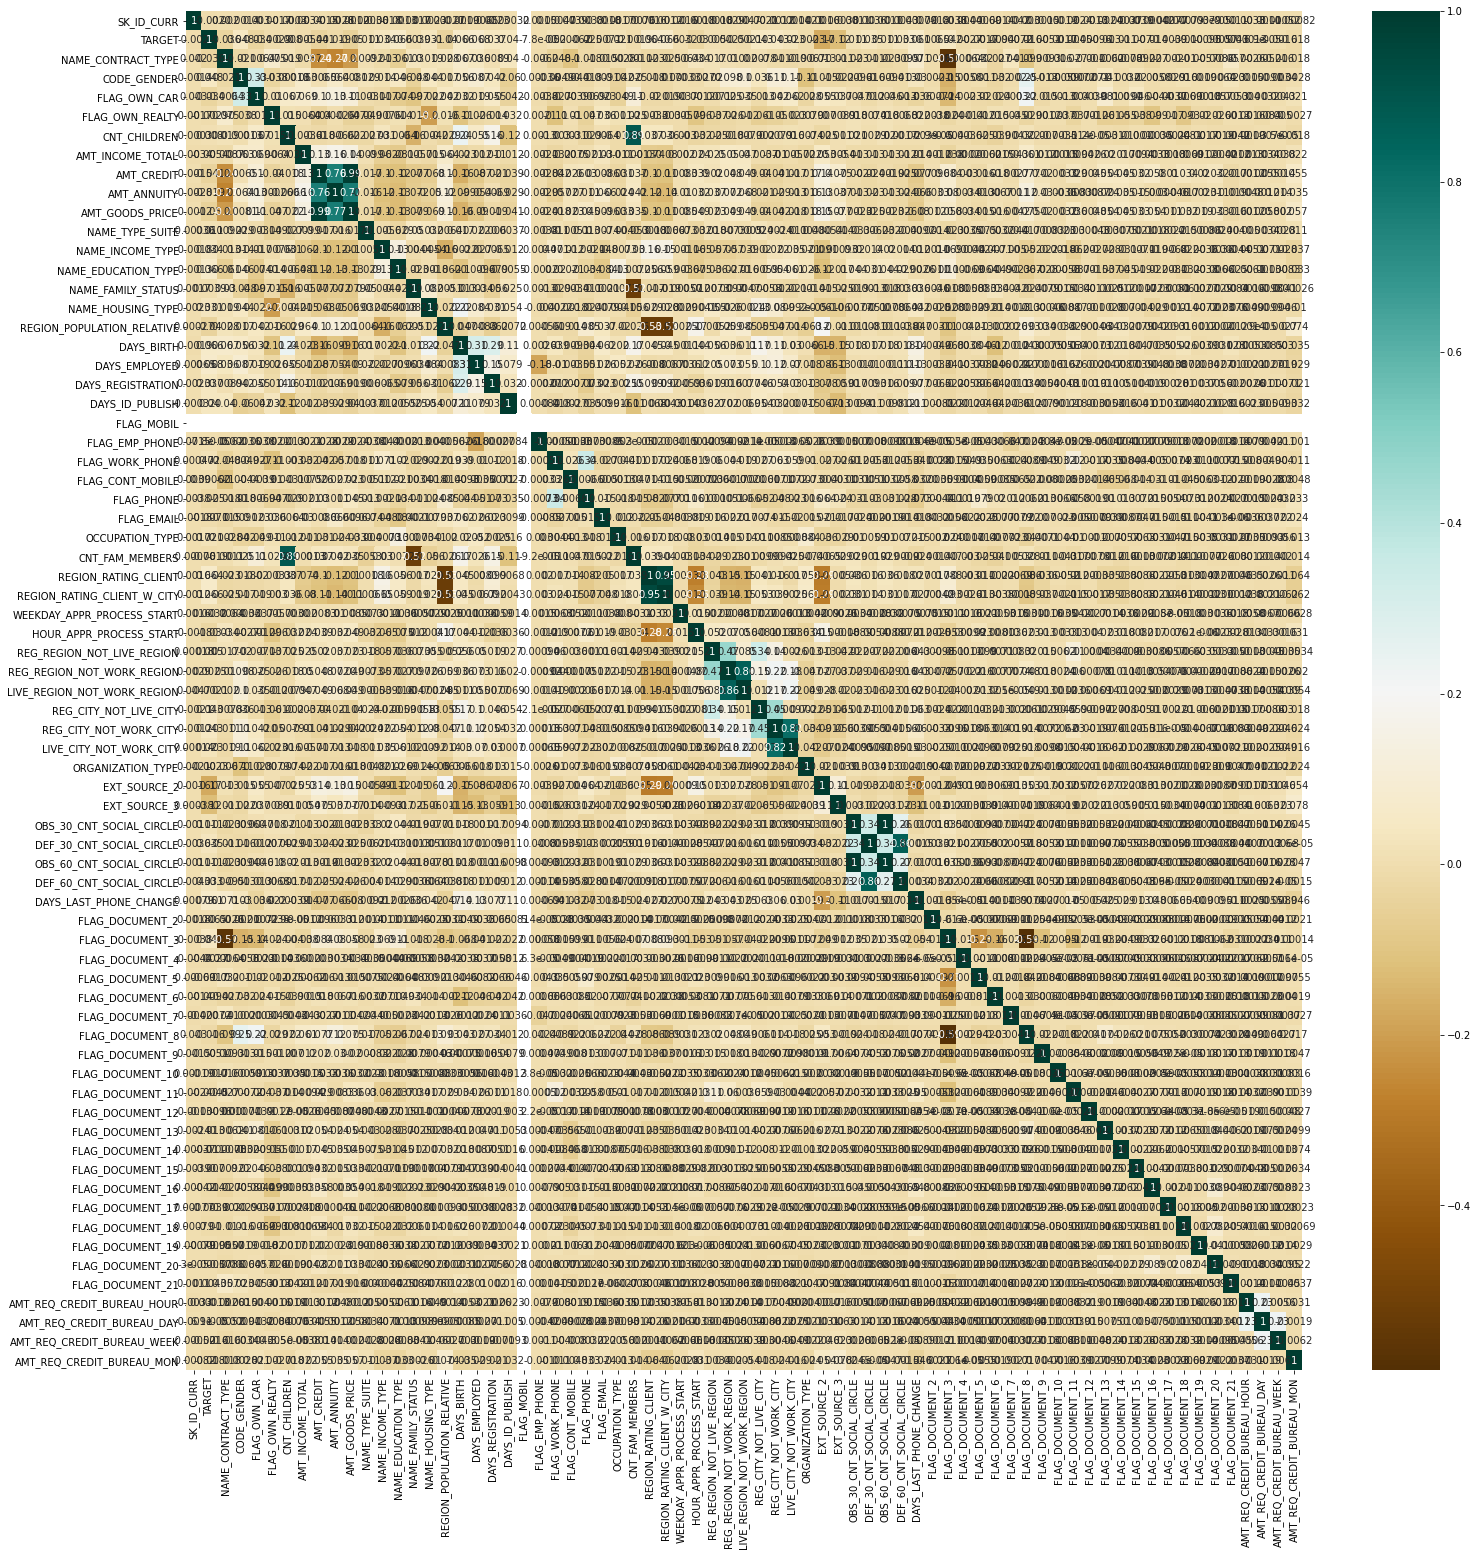

In [157]:
 corrmat = credit.corr()
top = corrmat.index
plt.figure(figsize=(25,25))
g = sns.heatmap(credit[top].corr(), annot=True, cmap='BrBG')

# lets connect our model prediction with the actual target

In [164]:
#predictions for each row of the dataset
for i in range(20):
    print(X[i], y_pred[i])

[-1.73327181e+00 -3.38347564e-01  1.25688874e+00 -7.82536387e-01
  6.85712429e-01 -6.57956296e-01 -6.57956296e-01  9.71300134e-02
 -5.02050829e-01 -2.11392350e-01 -5.27707797e-01  4.26775896e-01
  7.12626491e-01  6.47770537e-01  1.58525966e+00 -3.28035491e-01
 -1.39471422e-01  1.45524478e+00  6.69701778e-01  3.01496721e-01
  4.51865356e-01  0.00000000e+00  7.21846783e-03 -5.65998218e-01
  4.63203671e-02  1.61915714e+00 -2.58168884e-01  3.39376830e-02
 -1.33942250e+00 -9.73508847e-02 -5.59388557e-02  1.35942517e+00
 -6.63818738e-01 -1.30515257e-01 -2.53957667e-01 -2.25674831e-01
 -3.14634390e-01 -6.25067352e-01 -5.29201135e-01 -1.08754393e+00
 -1.31723028e+00 -9.86482681e-01  2.41324263e-01  4.18976892e+00
  2.50692897e-01  5.28518520e+00 -1.93607377e-01 -7.53946162e-03
  5.59256444e-01 -8.70590287e-03 -1.28149021e-01 -9.14774338e-02
 -1.39370697e-02 -3.31604376e-01 -6.52486308e-02 -5.33112868e-03
 -6.97455584e-02 -3.07789942e-03 -6.52852277e-02 -5.68450134e-02
 -3.80365594e-02 -1.09889

In [166]:
#lets see what the model predit for  row 10 
print(X[10], y_pred[10])

[-1.73262021e+00 -3.38347564e-01  1.25688874e+00  1.27789585e+00
  6.85712429e-01  6.50334032e-01  6.50334032e-01  6.69561538e-01
  7.43164952e-02 -3.59855372e-02 -8.08141361e-02  4.26775896e-01
  7.12626491e-01  6.47770537e-01  6.13158739e-01 -3.28035491e-01
 -9.79608786e-01  1.58493530e-01  2.43277668e-01  7.70323158e-01
 -1.43674129e+00  0.00000000e+00  7.21846783e-03 -5.65998218e-01
  4.63203671e-02 -6.17605281e-01 -2.58168884e-01  3.39376830e-02
 -2.76957209e-01 -9.73508847e-02 -5.59388557e-02 -9.73347241e-01
 -3.60368189e-01 -1.30515257e-01  3.93766415e+00  4.43115431e+00
 -3.14634390e-01  1.59982760e+00  1.88964069e+00  1.75264949e+00
 -1.34974410e+00  1.15187416e+00 -5.86195280e-01 -3.15467716e-01
 -5.84474064e-01 -2.71783955e-01  1.04031452e+00 -7.53946162e-03
  5.59256444e-01 -8.70590287e-03 -1.28149021e-01 -9.14774338e-02
 -1.39370697e-02 -3.31604376e-01 -6.52486308e-02 -5.33112868e-03
 -6.97455584e-02 -3.07789942e-03 -6.52852277e-02 -5.68450134e-02
 -3.80365594e-02 -1.09889

In [173]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

# lets create a dataframe for our predictions so we can check it against  the actual prediction. 

In [186]:
our_prediction = pd.DataFrame(y_pred)

In [203]:
our_prediction.to_csv('credit_scoring_predictionss.csv')


In [204]:
df = pd.read_csv('credit_scoring_predictionss.csv',  index_col=None)


In [205]:
df.head()

,Unnamed: 0,0
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [206]:
df.rename(columns={'0': 'credit_predictions'}, inplace=True)
df.head()

,Unnamed: 0,credit_predictions
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [207]:
#our prediction   says that over 41860 will not default while 364 will default. 
df['credit_predictions'].value_counts()

0    41860
1      364
Name: credit_predictions, dtype: int64

In [ ]:
#lets see the actual prediction

credit['credit_predictions'].value_counts()

# lets see the actual prediction

In [208]:
y_test

,TARGET
168063,0
71311,0
89664,0
33658,0
125456,0
...,...
89591,0
209019,0
91313,0
17473,0


In [209]:
actual_prediction = pd.DataFrame(y_test)

In [210]:
actual_prediction.to_csv('actual_predictions.csv')


In [212]:
ff = pd.read_csv('actual_predictions.csv',  index_col=None)
ff.head()


,Unnamed: 0,TARGET
0,168063,0
1,71311,0
2,89664,0
3,33658,0
4,125456,0


In [213]:
ff['TARGET'].value_counts()

0    38602
1     3622
Name: TARGET, dtype: int64

In [214]:
#the actual prediction (target) which they provided base on assumptions, says 38602 will not default will 3622 will default 
#meanwhile 

#our prediction   says that over 41860 will not default while only 364 will default. 
